In [1]:
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
sf_crime = pd.read_csv('data/train.csv') 
sf_locs = pd.read_csv('data/sf_locations_zip.csv') 

In [6]:
sf_crime['Location'] = sf_crime['Y'].astype(str).str.cat(sf_crime['X'].astype(str), sep=',')
sf_crime_locs = sf_crime.merge(sf_locs[['Location','ZipCode']], how='left', on='Location')

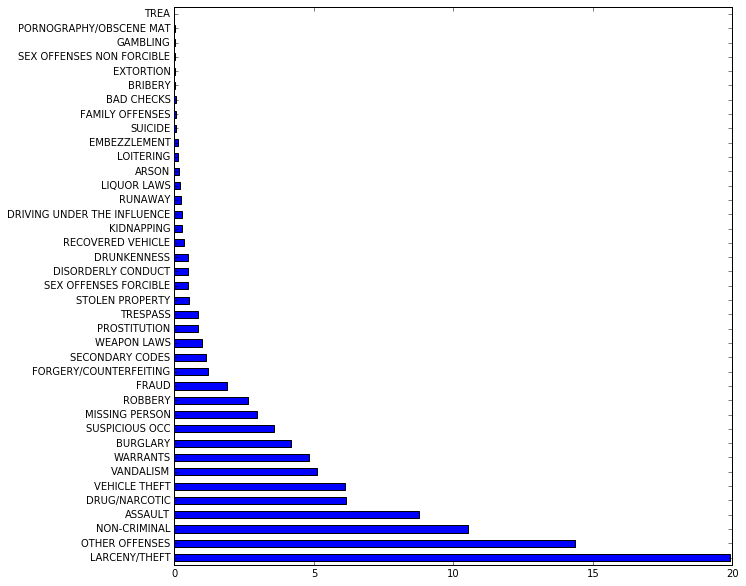

In [17]:
crime_cats =sf_crime_locs.Category.value_counts()
crime_cats = 100*crime_cats/sum(crime_cats)
mpl.rcParams['figure.figsize'] = (10.0, 10.0)
crime_cats.plot.barh()

In [18]:
topcats = sf_crime_locs['Category'].value_counts().index.tolist()[10:]
sf_crime_locs['Category_TopN'] = sf_crime_locs['Category']
sf_crime_locs.loc[sf_crime_locs['Category_TopN'].isin(topcats), 'Category_TopN'] = 'OTHER CRIMES'

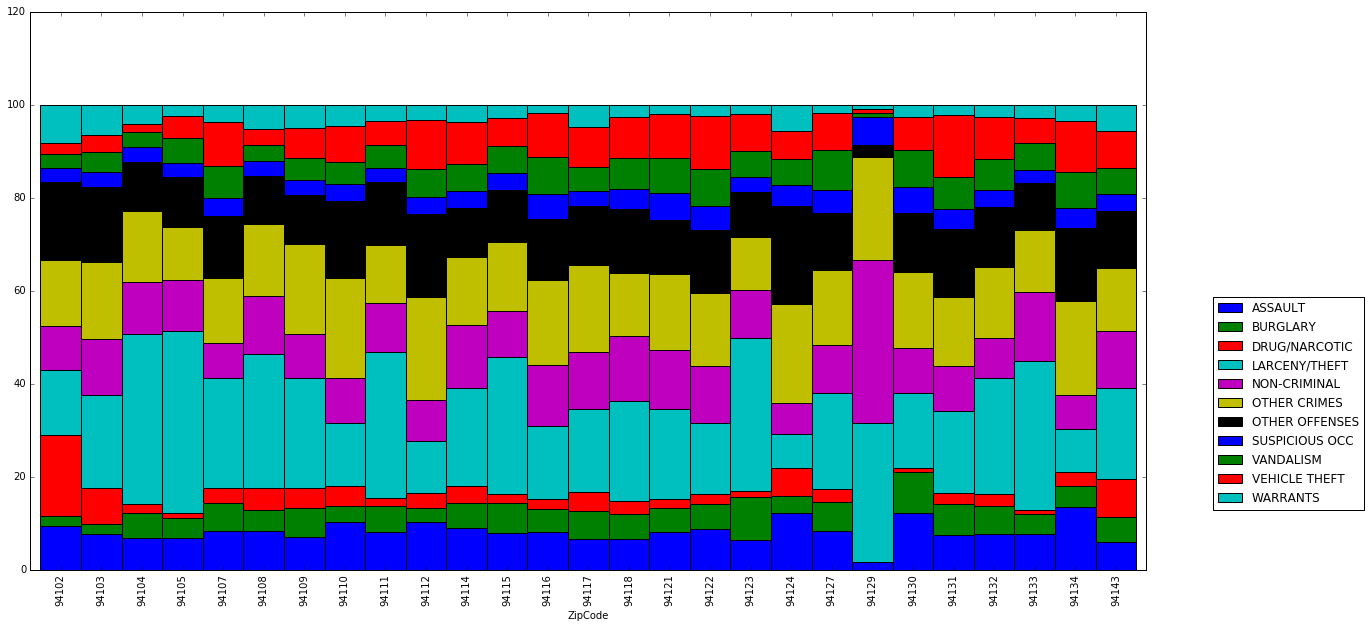

In [46]:
zip_count = sf_crime_locs.groupby(['ZipCode']).size()
zip_cat_count = sf_crime_locs.groupby(['ZipCode', 'Category_TopN']).size()

zip_cat_pct = zip_cat_count.div(zip_count, level='ZipCode') * 100
zip_cat_pct.unstack().T.head(2)
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
zip_cat_pct.unstack().plot(kind='bar', stacked=True, width=1).legend(bbox_to_anchor=(1.2, 0.5))
plt.show()

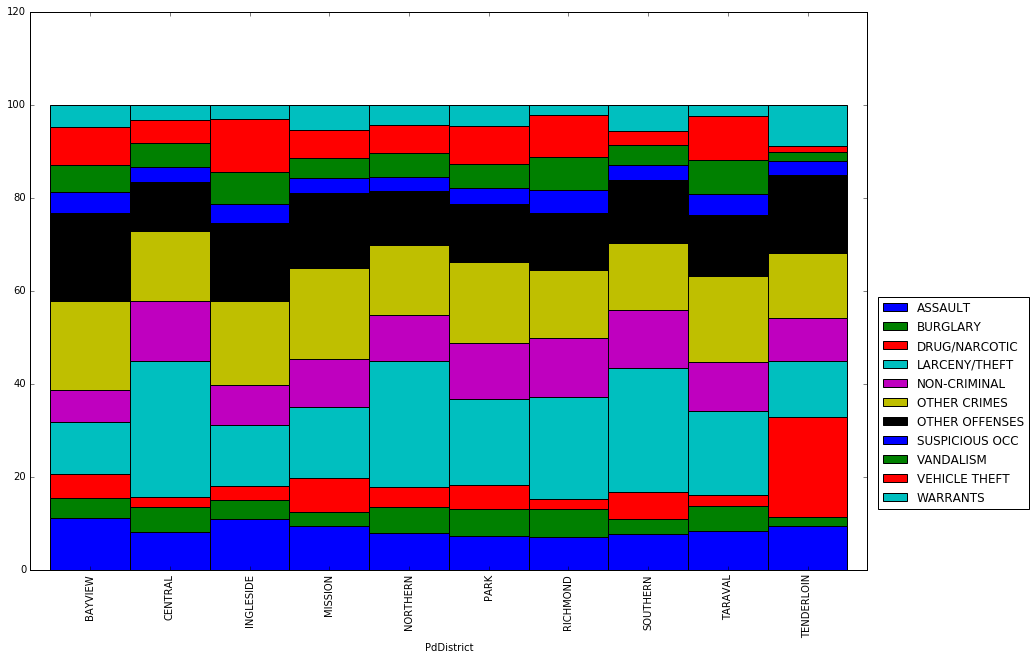

In [50]:
pdd_count = sf_crime_locs.groupby(['PdDistrict']).size()
pdd_cat_count = sf_crime_locs.groupby(['PdDistrict', 'Category_TopN']).size()

pdd_cat_pct = pdd_cat_count.div(pdd_count, level='PdDistrict') * 100
pdd_cat_pct.unstack().T.head()

mpl.rcParams['figure.figsize'] = (15.0, 10.0)
pdd_cat_pct.unstack().plot(kind='bar', stacked=True, width=1).legend(bbox_to_anchor=(1.2, 0.5))
plt.show()

In [9]:
sf_crime_locs['X'].describe()

count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

In [54]:
sf_crime_locs['Week'] = pd.to_datetime(sf_crime_locs['Dates']).map(lambda x: x.isocalendar()[1])
#sf_crime_locs['Week'].value_counts()

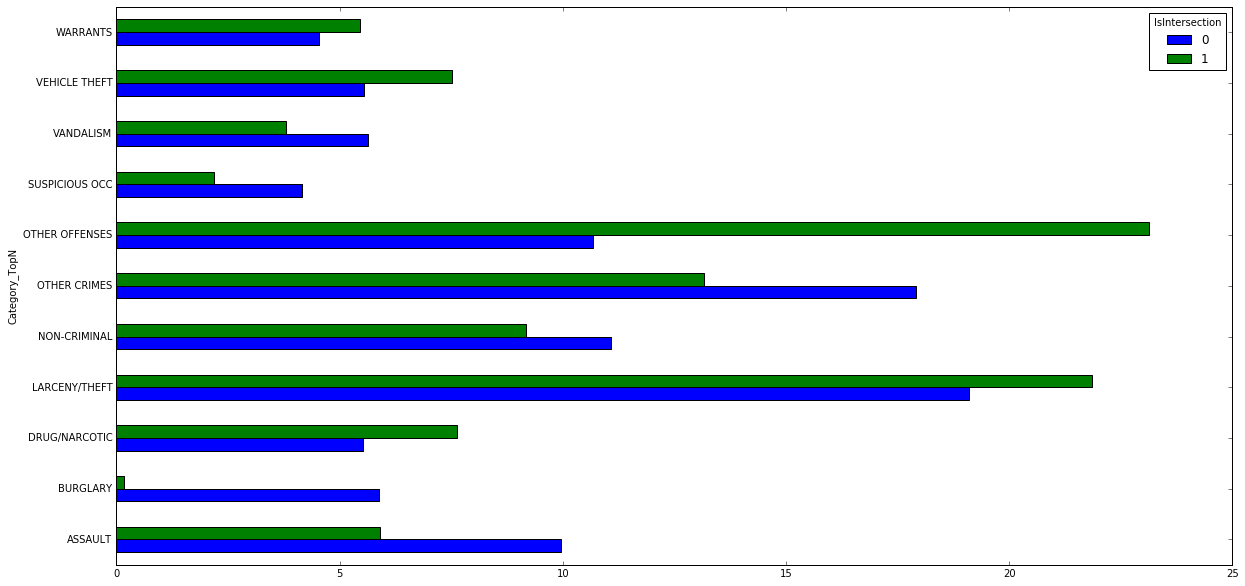

In [44]:
sf_crime_locs['IsIntersection'] = sf_crime_locs['Address'].apply(lambda x: 0 if x.find("/") < 0 else 1)

isi_count = sf_crime_locs.groupby(['IsIntersection']).size()
isi_cat_count = sf_crime_locs.groupby(['IsIntersection', 'Category_TopN']).size()

isi_cat_pct = isi_cat_count.div(isi_count, level='IsIntersection') * 100
isi_cat_pct.unstack().T.head()
isi_cat_pct.unstack().T.plot(kind='barh')

In [51]:
sf_crime_locs['HourOfDay'] = pd.to_datetime(sf_crime_locs['Dates']).map(lambda x: x.hour)
sf_crime_locs['HourOfDay'] = pd.cut(sf_crime_locs['HourOfDay'], bins = [0,3,6,9,12,15,18,21,24], right=False)

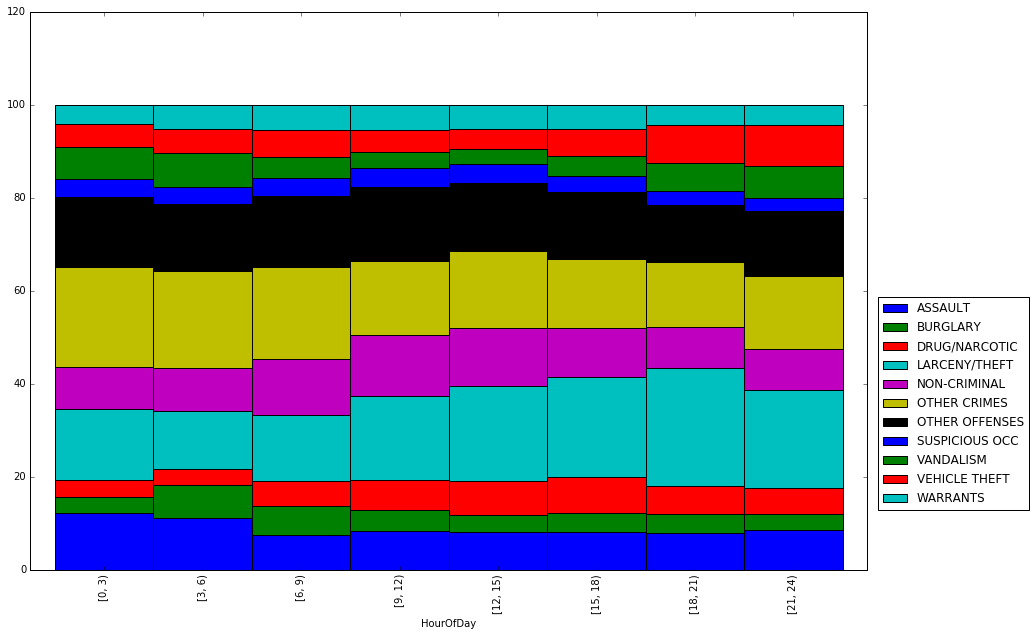

In [55]:
hod_count = sf_crime_locs.groupby(['HourOfDay']).size()
hod_cat_count = sf_crime_locs.groupby(['HourOfDay', 'Category_TopN']).size()

hod_cat_pct = hod_cat_count.div(hod_count, level='HourOfDay') * 100
hod_cat_pct.unstack().T.head()

mpl.rcParams['figure.figsize'] = (15.0, 10.0)
hod_cat_pct.unstack().plot(kind='bar', stacked=True, width=1).legend(bbox_to_anchor=(1.2, 0.5))
plt.show()

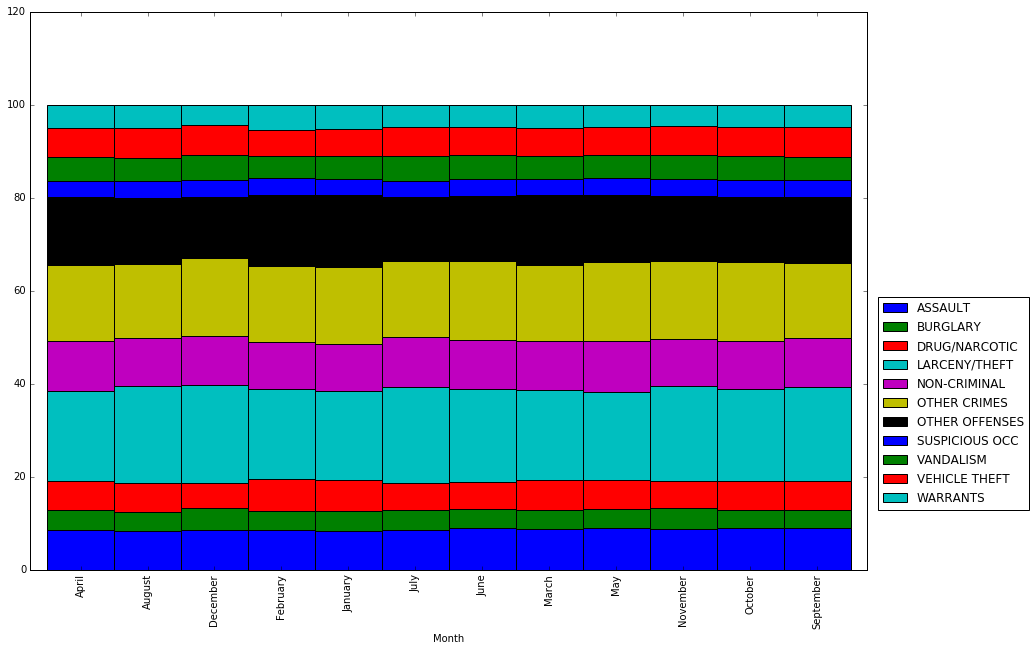

In [56]:
sf_crime_locs['Month'] = pd.to_datetime(sf_crime_locs['Dates']).map(lambda x: x.strftime("%B"))

mon_count = sf_crime_locs.groupby(['Month']).size()
mon_cat_count = sf_crime_locs.groupby(['Month', 'Category_TopN']).size()

mon_cat_pct = mon_cat_count.div(mon_count, level='Month') * 100
mon_cat_pct.unstack().T.head()

mpl.rcParams['figure.figsize'] = (15.0, 10.0)
mon_cat_pct.unstack().plot(kind='bar', stacked=True, width=1).legend(bbox_to_anchor=(1.2, 0.5))
plt.show()